In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import sys
import tensorflow as tf
from glob import glob
import json

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras.layers import Activation, Convolution2D, Dropout, Conv2D
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential

import warnings
warnings.filterwarnings('ignore')

In [3]:
import shutil
import os
# os.remove('/kaggle/working/labels_112_4_class.json')
# os.remove('/kaggle/working/best_model_resemote_112.keras')
# os.remove('/kaggle/working/last_model_custom_112_4.keras')
# shutil.rmtree("/kaggle/working/cropped_images_112_4_class")

In [4]:
import cv2
import numpy as np
import json
from glob import glob
import os

# 저장할 디렉터리 설정
save_image_dir = './cropped_images_112_4_class/'
save_label_file = './labels_112_4_class.json'

# 이미지 저장 디렉토리 생성
if not os.path.exists(save_image_dir):
    os.makedirs(save_image_dir)

# 라벨 리스트
labels = []

# 이미지 경로 리스트
image_data = glob('/kaggle/input/*/*/*.jpg')
print(len(image_data))

neu_json_file_path = '/kaggle/input/emotion-label-4/img_emotion_validation_data(중립).json'
hap_json_file_path = '/kaggle/input/emotion-label-4/img_emotion_validation_data(기쁨).json'
emb_json_file_path = '/kaggle/input/emotion-label-4/img_emotion_validation_data(당황).json'
unr_json_file_path = '/kaggle/input/emotion-label-4/img_emotion_validation_data(불안).json'

with open(neu_json_file_path, 'r', encoding='utf-8') as f:
    neu_data = json.load(f)
with open(hap_json_file_path, 'r', encoding='utf-8') as f:
    hap_data = json.load(f)
with open(emb_json_file_path, 'r', encoding='utf-8') as f:
    emb_data = json.load(f)
with open(unr_json_file_path, 'r', encoding='utf-8') as f:
    unr_data = json.load(f)


data_label = emb_data + neu_data + hap_data + unr_data

# 이미지 처리 및 저장
for idx, image_path in enumerate(image_data):
    image = cv2.imread(image_path)
    if image is None:
        print(f"이미지 로드 실패: {image_path}")
        continue  # 이미지 로드 실패 시 건너뜀

    image_height, image_width, _ = image.shape

    x, y, width, height = 0, 0, 0, 0
    emotion_label = ''

    # 바운딩 박스 및 라벨 추출
    for item in data_label:
        if item['filename'] == image_path.split('/')[-1]:
            x = int(item['annot_A']['boxes']['minX'])
            y = int(item['annot_A']['boxes']['minY'])
            width = int(item['annot_A']['boxes']['maxX'] - item['annot_A']['boxes']['minX'])
            height = int(item['annot_A']['boxes']['maxY'] - item['annot_A']['boxes']['minY'])
            emotion_label = item['faceExp_uploader']
            break

    if width > 0 and height > 0:
        # 이미지 크롭
        cropped_image = image[y:y+height, x:x+width]

        # 크롭된 이미지가 유효한지 확인 (높이나 너비가 0이 아닌지 확인)
        if cropped_image.size == 0 or cropped_image.shape[0] == 0 or cropped_image.shape[1] == 0:
            print(f"잘못된 크롭된 이미지: {image_path}")
            continue  # 크롭된 이미지가 비어 있거나 잘못된 경우 건너뜀

        # 이미지 리사이즈
        resized_image = cv2.resize(cropped_image, (112, 112))  # 크기 조정
        resized_image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

        # 이미지 저장 (파일 이름을 인덱스로 설정)
        image_save_path = os.path.join(save_image_dir, f'cropped_{idx}.npy')
        np.save(image_save_path, resized_image_rgb)

        # 라벨 저장 (원-핫 인코딩)
        if emotion_label == '중립':
            label = [1, 0, 0, 0]
        elif emotion_label == '기쁨':
            label = [0, 1, 0, 0]
        elif emotion_label == '당황':
            label = [0, 0, 1, 0]
        elif emotion_label == '불안':
            label = [0, 0, 0, 1]
#         elif emotion_label == '분노':
#             label = [0, 0, 0, 1, 0]
#         elif emotion_label == '상처':
#             label = [0, 0, 0, 0, 1]
#         elif emotion_label == '불안':
#             label = [0, 0, 0, 0, 0, 1]
#         elif emotion_label == '슬픔':
#             label = [0, 0, 0, 0, 0, 0, 1]
        else:
            continue  # 라벨이 없으면 건너뜀

        # 라벨을 리스트에 추가
        labels.append({'image': image_save_path, 'label': label})

# 라벨을 JSON 파일로 저장
with open(save_label_file, 'w') as f:
    json.dump(labels, f)

print("이미지 및 라벨 저장 완료.")

17730


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Premature e

잘못된 크롭된 이미지: /kaggle/input/emotion-data-neu/EMOIMG_중립_VALID/7d316d614dbd22b33df44768199cffa8212ad676673c6bf02b50e1834f8cf2cb_여_20_중립_숙박 및 거주공간_20210210134642-010-030.jpg


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


잘못된 크롭된 이미지: /kaggle/input/emotion-data-neu/EMOIMG_중립_VALID/7d316d614dbd22b33df44768199cffa8212ad676673c6bf02b50e1834f8cf2cb_여_20_중립_숙박 및 거주공간_20210210134642-010-006.jpg


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


잘못된 크롭된 이미지: /kaggle/input/emotion-data-neu/EMOIMG_중립_VALID/0b33836b914f544c31e3a642ccccbb94114040537440b4df3b9250d025fc39a5_여_20_중립_숙박 및 거주공간_20210209152239-010-014.jpg


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


잘못된 크롭된 이미지: /kaggle/input/emotion-data-neu/EMOIMG_중립_VALID/0b33836b914f544c31e3a642ccccbb94114040537440b4df3b9250d025fc39a5_여_20_중립_숙박 및 거주공간_20210209152239-010-025.jpg


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


잘못된 크롭된 이미지: /kaggle/input/emotion-data-neu/EMOIMG_중립_VALID/7d316d614dbd22b33df44768199cffa8212ad676673c6bf02b50e1834f8cf2cb_여_20_중립_숙박 및 거주공간_20210210134642-010-032.jpg


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


잘못된 크롭된 이미지: /kaggle/input/emotion-data-neu/EMOIMG_중립_VALID/7d316d614dbd22b33df44768199cffa8212ad676673c6bf02b50e1834f8cf2cb_여_20_중립_실외 자연환경_20210210141933-007-004.jpg
잘못된 크롭된 이미지: /kaggle/input/emotion-data-neu/EMOIMG_중립_VALID/7d316d614dbd22b33df44768199cffa8212ad676673c6bf02b50e1834f8cf2cb_여_20_중립_숙박 및 거주공간_20210210134642-010-028.jpg


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


잘못된 크롭된 이미지: /kaggle/input/emotion-data-neu/EMOIMG_중립_VALID/75c5623c1ff04d118f654598dc777ab3aa13f62762f36f6351b8e980db927cbe_남_20_중립_실외 자연환경_20210225002248-007-002.jpg


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


잘못된 크롭된 이미지: /kaggle/input/emotion-data-neu/EMOIMG_중립_VALID/7d316d614dbd22b33df44768199cffa8212ad676673c6bf02b50e1834f8cf2cb_여_20_중립_숙박 및 거주공간_20210210134642-010-033.jpg


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


잘못된 크롭된 이미지: /kaggle/input/emotion-data-neu/EMOIMG_중립_VALID/75c5623c1ff04d118f654598dc777ab3aa13f62762f36f6351b8e980db927cbe_남_20_중립_숙박 및 거주공간_20210225002301-010-002.jpg


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


잘못된 크롭된 이미지: /kaggle/input/emotion-data-neu/EMOIMG_중립_VALID/0b33836b914f544c31e3a642ccccbb94114040537440b4df3b9250d025fc39a5_여_20_중립_숙박 및 거주공간_20210209152239-010-033.jpg


Invalid SOS parameters for sequential JPEG


잘못된 크롭된 이미지: /kaggle/input/emotion-data-neu/EMOIMG_중립_VALID/7d316d614dbd22b33df44768199cffa8212ad676673c6bf02b50e1834f8cf2cb_여_20_중립_숙박 및 거주공간_20210210134642-010-020.jpg
잘못된 크롭된 이미지: /kaggle/input/emotion-data-neu/EMOIMG_중립_VALID/7d316d614dbd22b33df44768199cffa8212ad676673c6bf02b50e1834f8cf2cb_여_20_중립_실외 자연환경_20210210141933-007-011.jpg


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


잘못된 크롭된 이미지: /kaggle/input/emotion-data-neu/EMOIMG_중립_VALID/33baf31f61241358f6898cfa7e3262bf409725c44caf6f660e16dc33940fc305_여_20_중립_도심 환경_20210213232818-008-010.jpg


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS

잘못된 크롭된 이미지: /kaggle/input/emotion-data-hap/EMOIMG_기쁨_VALID/ac5db648061b4c8458340301ada76f9aaea90a0f28601b1a7d6cd1c8e63ba648_남_20_기쁨_문화재 및 유적지_20210218173543-009-001.jpg


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS

잘못된 크롭된 이미지: /kaggle/input/emotion-data-embb/EMOIMG_당황_VALID/2f56effc820a986f83fb41b5e75be3a8c15bc27ed27402a939c0a60ec2e2529b_여_20_당황_숙박 및 거주공간_20210216110620-010-006.jpg


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS

잘못된 크롭된 이미지: /kaggle/input/emotion-data-embb/EMOIMG_당황_VALID/2f56effc820a986f83fb41b5e75be3a8c15bc27ed27402a939c0a60ec2e2529b_여_20_당황_숙박 및 거주공간_20210216110620-010-012.jpg


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


이미지 및 라벨 저장 완료.


In [5]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 이미지 저장 경로 및 레이블 파일 경로
save_image_dir = './cropped_images_112_4_class'
save_label_file = './labels_112_4_class.json'

# 이미지 크기 (예: 112x112)
image_size = (112, 112)

# 1. 레이블 데이터 로드
with open(save_label_file, 'r') as f:
    labels = json.load(f)  # JSON 파일에서 레이블 로드

# 2. 이미지 파일과 레이블을 리스트에 저장
images = []
emotions = []

# labels는 리스트로 가정하며, 각 항목이 {"image": "path_to_image", "label": [1, 0, 0]} 형태
for entry in labels:
    image_path = entry['image']
    label = entry['label']
    
    # 이미지 로드 (.npy 파일로부터 로드)
    image = np.load(image_path)
    
    if image is not None:
        
        # 정규화 (0~1 범위로)
        image = image.astype('float32') / 255.0
        
        # 이미지를 리스트에 추가
        images.append(image)
        
        # 레이블을 리스트에 추가
        emotions.append(label)

# 3. NumPy 배열로 변환
images = np.array(images)
emotions = np.array(emotions)

In [6]:
print(len(images), len(emotions))

8926 8926


(112, 112, 3)


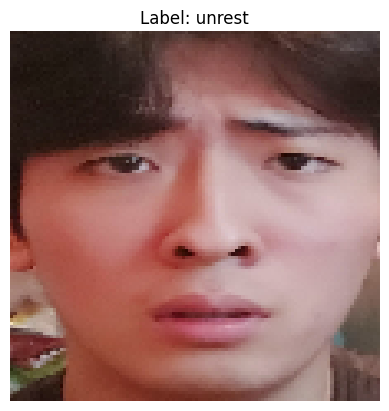

In [7]:
image = images[1000]
label = emotions[1000]
print(image.shape)
# 라벨을 텍스트로 변환 (원-핫 인코딩된 값을 감정으로 변환)
# label_dict = {0: "good", 1: "bad"}
label_dict = {0: "neutral", 1: "happy", 2: "embarrased", 3: "unrest"}
emotion = label_dict[np.argmax(label)]

plt.imshow(image, cmap='gray')  # 만약 흑백 이미지라면 'cmap='gray''를 사용
plt.title(f"Label: {emotion}")    # 레이블을 제목으로 출력

# 축 숨기기
plt.axis('off')

# 그래프 그리기
plt.show()

In [8]:
# 4. 학습 및 검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(images, emotions, test_size=0.2, random_state=42)

In [9]:
neu = 0
hap = 0
emb = 0
unr = 0

for i in range(len(y_train)):
    if np.argmax(y_train[i]) == 0:
        neu += 1
    elif np.argmax(y_train[i]) == 1:
        hap += 1
    elif np.argmax(y_train[i]) == 2:
        emb += 1
    elif np.argmax(y_train[i]) == 3:
        unr += 1

print(neu, hap, emb, unr)

1856 2083 1443 1758


In [3]:
image = np.load("C:/Users/USER/Downloads/choice/cho_image/cho_image/cropped_100.npy")

In [5]:
input_shape=(112, 112, 3)
num_classes = 4

model = Sequential()
model.add(Convolution2D(filters=16, kernel_size=(7, 7), padding='same',
                            name='image_array', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Convolution2D(filters=16, kernel_size=(7, 7), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=32, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=32, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=256, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=num_classes, kernel_size=(3, 3), padding='same'))
model.add(GlobalAveragePooling2D())

model.add(Activation('softmax',name='predictions'))

In [6]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

# 이미지 저장 경로 및 레이블 파일 경로
save_image_dir = "C:/Users/USER/Downloads/choice/cho_image/cho_image"
save_label_file = "C:/Users/USER/Downloads/choice/cho_image/cho_label/label.json"

# 이미지 크기 (예: 112x112)
image_size = (112, 112)

# 1. 레이블 데이터 로드
with open(save_label_file, 'r') as f:
    labels = json.load(f)  # JSON 파일에서 레이블 로드

# 2. 이미지 파일과 레이블을 리스트에 저장
images = []
emotions = []

# labels는 리스트로 가정하며, 각 항목이 {"image": "path_to_image", "label": [1, 0, 0]} 형태
for entry in labels:
    image_path = entry['image']  # 이미지 경로
    label = entry['label']       # 라벨 (예: [1, 0, 0, 0])

    # 이미지 로드 (.npy 파일로부터 로드)
    full_image_path = f"{save_image_dir}/{image_path}"
    image = np.load(full_image_path)

    if image is not None:
        # 정규화 (0~1 범위로)
        image = image.astype('float32') / 255.0

        # 이미지를 리스트에 추가
        images.append(image)

        # 레이블을 리스트에 추가
        emotions.append(label)

# 3. NumPy 배열로 변환
images = np.array(images)
emotions = np.array(emotions)

# 4. 학습 및 검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(images, emotions, test_size=0.2, random_state=42)

# 5. 데이터를 tf.data.Dataset으로 변환
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(batch_size)

validation_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
validation_dataset = validation_dataset.batch(batch_size)

# 모델 컴파일 및 학습 준비
# model은 사전에 정의된 모델입니다.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 학습 콜백 설정
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-9)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='best_model_custom_112_4.keras', monitor='val_loss', save_best_only=True, save_weights_only=False, mode='min', verbose=1)

# 모델 학습
history = model.fit(
    train_dataset,
    epochs=200,
    validation_data=validation_dataset,
    callbacks=[reduce_lr, early_stopping, model_checkpoint]
)


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/USER/Downloads/choice/cho_image/cho_image//mnt/c/Users/user/Downloads/한국인 감정인식을 위한 복합 영상/crop_val/cho_image/cropped_3.npy'

In [ ]:
import tensorflow as tf

# 학습 파라미터
batch_size = 32
num_epochs = 200

# 4. 학습 및 검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(images, emotions, test_size=0.2, random_state=42)

# 데이터를 tf.data.Dataset으로 변환
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(batch_size)

validation_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
validation_dataset = validation_dataset.batch(batch_size)

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ReduceLROnPlateau 콜백 설정
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',  # 검증 손실을 기준으로 학습률을 조정
    factor=0.1,          # 학습률을 10%로 감소
    patience=5,
    min_lr=1e-9          # 학습률이 이 값 이하로는 떨어지지 않음
)

# EarlyStopping 콜백 설정
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # 검증 손실을 기준으로 모니터링
    patience=15,         # 5 에포크 동안 개선되지 않으면 멈춤
    restore_best_weights=True  # 가장 좋은 가중치를 복원
)

# ModelCheckpoint 콜백 설정 (Best 모델 저장)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model_custom_112_4.keras',  # 모델을 저장할 파일 경로
    monitor='val_loss',        # 검증 손실이 가장 적을 때 모델 저장
    save_best_only=True,       # 가장 좋은 모델만 저장
    save_weights_only=False,   # 전체 모델 저장 (가중치와 구조 모두 저장)
    mode='min',                # 모니터 기준이 '최소'일 때 저장 (val_loss가 낮을수록 좋음)
    verbose=1                  # 모델 저장 시 출력 메시지 표시
)

# 모델 학습
history = model.fit(
    train_dataset,
    epochs=num_epochs,
    validation_data=validation_dataset,
    callbacks=[reduce_lr, early_stopping, model_checkpoint]  # 콜백 리스트에 ModelCheckpoint 추가
)

Epoch 1/200


I0000 00:00:1730125137.287023      68 service.cc:145] XLA service 0x792360003570 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730125137.287085      68 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  6/224 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.1766 - loss: 1.6688   

I0000 00:00:1730125149.912634      68 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.3196 - loss: 1.4161

I0000 00:00:1730125164.591698      69 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_4', 36 bytes spill stores, 36 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_59', 36 bytes spill stores, 36 bytes spill loads




Epoch 1: val_loss improved from inf to 1.42887, saving model to best_model_custom_112_4.keras
224/224 ━━━━━━━━━━━━━━━━━━━━ 37s 79ms/step - accuracy: 0.3200 - loss: 1.4153 - val_accuracy: 0.3712 - val_loss: 1.4289 - learning_rate: 0.0010
Epoch 2/200
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6082 - loss: 0.8899
Epoch 2: val_loss did not improve from 1.42887
224/224 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.6083 - loss: 0.8897 - val_accuracy: 0.4569 - val_loss: 1.7894 - learning_rate: 0.0010
Epoch 3/200
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6824 - loss: 0.7517
Epoch 3: val_loss improved from 1.42887 to 0.88134, saving model to best_model_custom_112_4.keras
224/224 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.6824 - loss: 0.7516 - val_accuracy: 0.6293 - val_loss: 0.8813 - learning_rate: 0.0010
Epoch 4/200
223/224 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7020 - loss: 0.6832
Epoch 4: val_loss improved from 0.88134 to 0.87561, saving model to b

In [12]:
model.save('last_model_custom_112_4.keras')

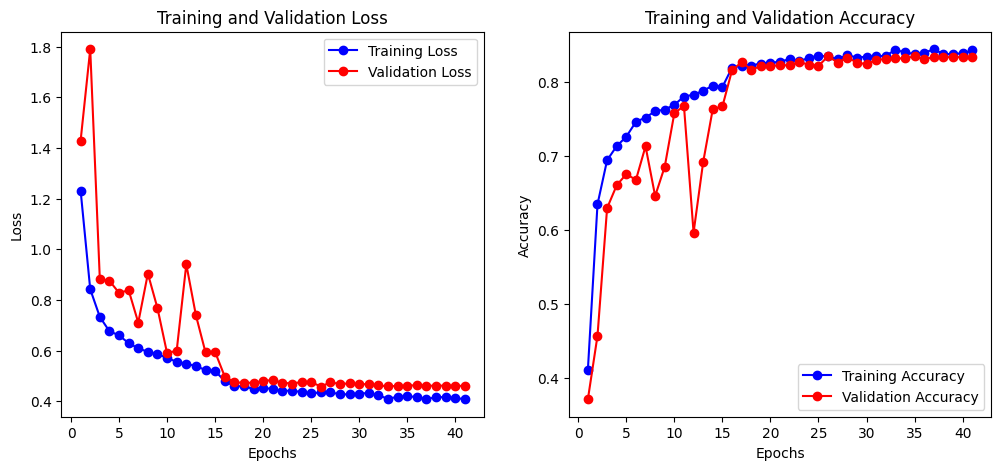

In [13]:
# history 객체에서 손실과 정확도 값 가져오기
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 에포크 값
epochs = range(1, len(loss) + 1)

# 손실 그래프 그리기
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')  # 파란색 'bo-' 라인은 학습 손실
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')  # 빨간색 'ro-' 라인은 검증 손실
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프 그리기
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')  # 파란색 'bo-' 라인은 학습 정확도
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')  # 빨간색 'ro-' 라인은 검증 정확도
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 그래프 출력
plt.show()

In [ ]:
import numpy as np
from collections import Counter

# 이미지 전처리 및 모델 예측 함수
def predict_labels_from_images(model, image_list):
    images = []

    # 이미지 리스트 처리 (이미 numpy 형태이므로 전처리만 진행)
    for image in image_list:
        if image.shape != (112, 112, 3):
            print(f"잘못된 이미지 크기: {image.shape}, 스킵합니다.")
            continue
        
        # 이미 정규화가 안 되어 있으면 추가 가능 (예: image = image / 255.0)
        images.append(image)

    if len(images) == 0:
        print("예측할 이미지가 없습니다.")
        return None

    # numpy 배열로 변환
    images_np = np.array(images)
    
    # 모델 예측 (결과는 확률로 나옴)
    predictions = model.predict(images_np)
    
    # 예측된 클래스 라벨을 반환 (argmax를 사용하여 가장 높은 확률을 가진 클래스 선택)
    predicted_labels = np.argmax(predictions, axis=1)
    
    return predicted_labels, predictions, images_np

# 모델을 사용하여 이미지 리스트에 대해 예측
model = tf.keras.models.load_model('./ai_models/last_model_custom_112_4.keras')
predicted_labels, predictions, images= predict_labels_from_images(model, X_val)

# 예측된 라벨의 개수를 세기
if predicted_labels is not None:
    label_counts = Counter(predicted_labels)
    
    # 라벨별 개수 출력
    print("라벨별 개수:")
    for label, count in label_counts.items():
        print(f"라벨 {label}: {count}개")


56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
라벨별 개수:
라벨 2: 332개
라벨 1: 513개
라벨 3: 455개
라벨 0: 486개


[4.7996952e-03 5.7815120e-04 2.5043568e-01 7.4418652e-01]


Text(0.5, 1.0, 'True Label: unrest\nPredicted Class: unrest')

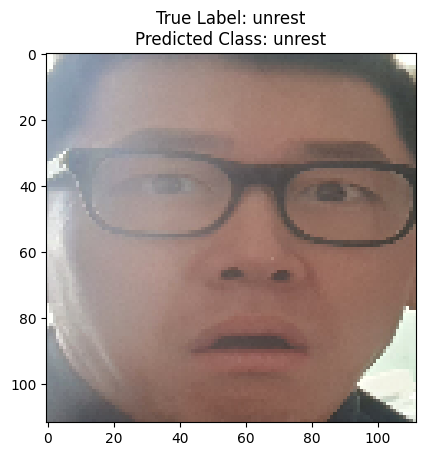

In [20]:
idx = 777
print(predictions[idx])
plt.imshow(X_val[idx])
label = {0: "neutral", 1: "happy", 2: "embarrased", 3: "unrest"}
plt.title(f"True Label: {label[np.argmax(y_val[idx])]}\nPredicted Class: {label[predicted_labels[idx]]}")